# TODO

## Installing Libraries

In [1]:
%pip install numpy pandas scipy matplotlib

## Data download and inspection

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, pathlib

In [3]:
!wget https://raw.githubusercontent.com/paolodeangelis/Sistemi_a_combustione/main/data/lab2/velprof-Re.csv
!wget https://raw.githubusercontent.com/paolodeangelis/Sistemi_a_combustione/main/data/lab2/velprof-data.csv
!wget https://raw.githubusercontent.com/paolodeangelis/Sistemi_a_combustione/main/data/lab2/velprof-space.csv

--2023-10-13 16:59:42--  https://raw.githubusercontent.com/paolodeangelis/Sistemi_a_combustione/main/data/lab2/velprof-Re.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1200006 (1.1M) [text/plain]
Saving to: ‘velprof-Re.csv’

velprof-Re.csv      100%[===================>]   1.14M  --.-KB/s    in 0.06s   

2023-10-13 16:59:42 (19.4 MB/s) - ‘velprof-Re.csv’ saved [1200006/1200006]

--2023-10-13 16:59:42--  https://raw.githubusercontent.com/paolodeangelis/Sistemi_a_combustione/main/data/lab2/velprof-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

Read Reynolds (the lables for our model)

In [4]:
data_Re = pd.read_csv("velprof-Re.csv", index_col=False)
data_Re.head()

,Re(-)
0,323590.756
1,194866.844
2,104938.956
3,227933.606
4,817618.639


Read the data file (the features for our model)

In [5]:
data_v = pd.read_csv("velprof-data.csv", index_col=False)
data_v.head()

,mu(Pas),rho(kg/m3),L(m),R(m),vel[0](m/s),vel[1](m/s),vel[2](m/s),vel[3](m/s),vel[4](m/s),vel[5](m/s),...,vel[40](m/s),vel[41](m/s),vel[42](m/s),vel[43](m/s),vel[44](m/s),vel[45](m/s),vel[46](m/s),vel[47](m/s),vel[48](m/s),vel[49](m/s)
0,0.000630,996.232835,69.244194,0.408814,0.299430,0.298652,0.297860,0.297052,0.296230,0.295391,...,0.241785,0.238218,0.234238,0.229725,0.224501,0.218267,0.210486,0.199988,0.183239,0.0
1,0.001484,1117.370480,94.471272,0.352740,0.443518,0.442301,0.441061,0.439799,0.438513,0.437201,...,0.353860,0.348349,0.342204,0.335246,0.327199,0.317612,0.305665,0.289586,0.264034,0.0
2,0.000372,1039.442220,89.215592,0.248828,0.092274,0.092004,0.091728,0.091448,0.091162,0.090870,...,0.072484,0.071278,0.069935,0.068416,0.066662,0.064576,0.061983,0.058504,0.053003,0.0
3,0.000189,1045.145970,20.190082,0.086718,0.286730,0.285957,0.285169,0.284366,0.283549,0.282715,...,0.229634,0.226117,0.222195,0.217751,0.212611,0.206484,0.198845,0.188556,0.172184,0.0
4,0.002309,1086.237000,17.299562,0.136982,7.472177,7.454603,7.436702,7.418460,7.399864,7.380898,...,6.157494,6.075227,5.983290,5.878885,5.757750,5.612884,5.431484,5.185726,4.791076,0.0


In [6]:
data_r = pd.read_csv("velprof-space.csv", index_col=False)
data_r.head()

,r[0](m),r[1](m),r[2](m),r[3](m),r[4](m),r[5](m),r[6](m),r[7](m),r[8](m),r[9](m),...,r[40](m),r[41](m),r[42](m),r[43](m),r[44](m),r[45](m),r[46](m),r[47](m),r[48](m),r[49](m)
0,0.0,0.008343,0.016686,0.025029,0.033373,0.041716,0.050059,0.058402,0.066745,0.075088,...,0.333726,0.342069,0.350412,0.358756,0.367099,0.375442,0.383785,0.392128,0.400471,0.408814
1,0.0,0.007199,0.014398,0.021596,0.028795,0.035994,0.043193,0.050391,0.057590,0.064789,...,0.287951,0.295150,0.302349,0.309548,0.316746,0.323945,0.331144,0.338343,0.345541,0.352740
2,0.0,0.005078,0.010156,0.015234,0.020312,0.025391,0.030469,0.035547,0.040625,0.045703,...,0.203125,0.208203,0.213281,0.218359,0.223437,0.228515,0.233593,0.238672,0.243750,0.248828
3,0.0,0.001770,0.003539,0.005309,0.007079,0.008849,0.010618,0.012388,0.014158,0.015928,...,0.070790,0.072560,0.074329,0.076099,0.077869,0.079639,0.081408,0.083178,0.084948,0.086718
4,0.0,0.002796,0.005591,0.008387,0.011182,0.013978,0.016773,0.019569,0.022364,0.025160,...,0.111822,0.114618,0.117414,0.120209,0.123005,0.125800,0.128596,0.131391,0.134187,0.136982


In [7]:
data_all =  pd.concat([data_v, data_Re], axis=1)

Let's plot a random profile

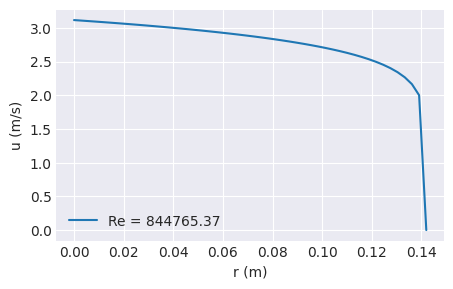

In [10]:
fig = plt.figure(figsize=(5,3))
indx = np.random.randint(data_v.shape[0]-1)

with plt.style.context("seaborn-v0_8-darkgrid"):
  ax = fig.add_subplot(111)
  ax.plot(data_r.iloc[indx,:], data_v.iloc[indx,4:], label=f"Re = {data_Re.iloc[indx].values[0]:1.2f}")
  ax.legend(loc="lower left")
  ax.set_xlabel("r (m)")
  ax.set_ylabel("u (m/s)")

Let's study the data and its correlation

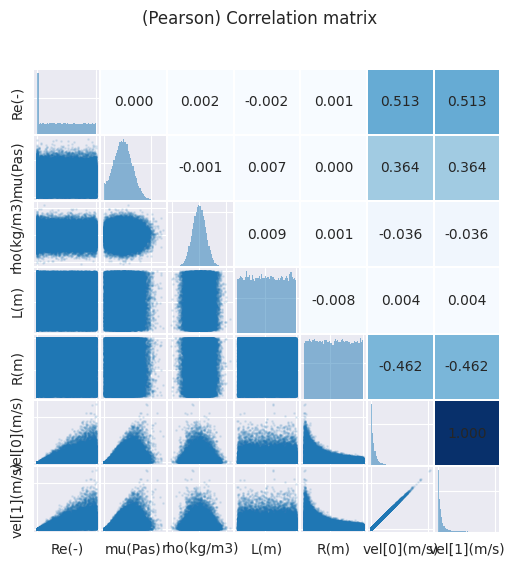

In [11]:
# Correlation matrix plot

Nbins = 50
fig = plt.figure(figsize=(6,6))
label = ["Re(-)", "mu(Pas)", "rho(kg/m3)", "L(m)", "R(m)", "vel[0](m/s)", "vel[1](m/s)"]
N = len(label)
corr_matrix = data_all.corr()
with plt.style.context("seaborn-v0_8-darkgrid"):
  gird = fig.add_gridspec(N, N, wspace=0.03, hspace=0.03)
  ax = []
  cmap = plt.get_cmap('Blues')
  for i in range(N):
    for j in range(N):
      ax.append(fig.add_subplot(gird[i,j]))
      if j < i:
        ax[-1].scatter(data_all[label[j]], data_all[label[i]], s=1, alpha=.1)
      elif j > i:
        corr = corr_matrix.loc[label[j], label[i]]
        ax[-1].text(.5, 0.5, f"{corr:1.3f}", ha="center", va="center")
        ax[-1].set_facecolor(cmap(np.abs(corr)))
        ax[-1].set_xticks([])
        ax[-1].set_yticks([])
      else:
        ax[-1].hist(data_all[label[i]], bins=Nbins, alpha=.5)
      if j == 0  or i == N-1:
        if j == 0  and i != N-1:
          ax[-1].set_ylabel(label[i])
          ax[-1].set_xticklabels([])
        elif i == N-1 and j != 0:
          ax[-1].set_xlabel(label[j])
          ax[-1].set_yticklabels([])
        else:
          ax[-1].set_ylabel(label[i])
          ax[-1].set_xlabel(label[j])
      ax[-1].set_xticklabels([])
      ax[-1].set_yticklabels([])
  fig.suptitle("(Pearson) Correlation matrix")
plt.show()

## Split database

80,000 is too many; let's reduce it to 5,000 by randomly selecting from the entire database.



In [12]:
Nall = data_v.shape[0]
Nsmall = 5000

rand_gen = np.random.default_rng(seed=1234)
indx = rand_gen.choice(np.arange(Nall), size=Nsmall, replace=False)

data_v_small = data_v.iloc[indx, :]
data_Re_small = data_Re.iloc[indx, :]

let's store it

In [30]:
data_v_small.to_csv("small-data.csv", index=False)
data_Re_small.to_csv("small-Re.csv", index=False)

## Model 1

We are going to use our model for binary classification, specifically to distinguish between turbulent and non-turbulent conditions. It's important to note that in the context of our database, "non-turbulent" refers to laminar conditions, although in reality, laminar flow isn't always the case.


We load the *features* and the *labels* of our first model

In [37]:
feature = pd.read_csv("small-data.csv", index_col=False).iloc[:,4:] # note: we drop the first 4 colomns to study only the velocity profile
label = pd.read_csv("small-Re.csv", index_col=False)


In [38]:
feature.head()

,vel[0](m/s),vel[1](m/s),vel[2](m/s),vel[3](m/s),vel[4](m/s),vel[5](m/s),vel[6](m/s),vel[7](m/s),vel[8](m/s),vel[9](m/s),...,vel[40](m/s),vel[41](m/s),vel[42](m/s),vel[43](m/s),vel[44](m/s),vel[45](m/s),vel[46](m/s),vel[47](m/s),vel[48](m/s),vel[49](m/s)
0,1.067542,1.065017,1.062446,1.059825,1.057153,1.054429,1.051649,1.048811,1.045913,1.042951,...,0.878768,0.866962,0.853770,0.838790,0.821411,0.800631,0.774614,0.739374,0.682805,0.0
1,0.099708,0.099392,0.099069,0.098741,0.098407,0.098067,0.097719,0.097365,0.097004,0.096635,...,0.076775,0.075392,0.073856,0.072120,0.070120,0.067748,0.064808,0.060879,0.054706,0.0
2,0.331809,0.330939,0.330054,0.329152,0.328233,0.327296,0.326340,0.325365,0.324369,0.323351,...,0.267457,0.263479,0.259041,0.254010,0.248185,0.241238,0.232568,0.220875,0.202231,0.0
3,4.654438,4.642508,4.630359,4.617982,4.605366,4.592503,4.579381,4.565989,4.552315,4.538346,...,3.769371,3.714517,3.653293,3.583869,3.503460,3.407497,3.287648,3.125854,2.867489,0.0
4,0.000371,0.000371,0.000370,0.000369,0.000368,0.000367,0.000365,0.000363,0.000361,0.000358,...,0.000124,0.000111,0.000098,0.000085,0.000072,0.000058,0.000044,0.000030,0.000015,-0.0


In [39]:
label.head()

,Re(-)
0,776550.104000
1,50171.564400
2,299778.741000
3,367642.557000
4,953.246478


In [18]:
len(data_Re_small["Re(-)"] < 2000)

5000

In [28]:
np.sum(data_Re_small["Re(-)"].values[:1000] <= 2000)

107

Now we split the training and test set (with ratio 80/20)

1.   List item
2.   List item



In [13]:
training_

,mu(Pas),rho(kg/m3),L(m),R(m),vel[0](m/s),vel[1](m/s),vel[2](m/s),vel[3](m/s),vel[4](m/s),vel[5](m/s),...,vel[40](m/s),vel[41](m/s),vel[42](m/s),vel[43](m/s),vel[44](m/s),vel[45](m/s),vel[46](m/s),vel[47](m/s),vel[48](m/s),vel[49](m/s)
48220,0.000860,970.297508,26.121333,0.379893,1.067542,1.065017,1.062446,1.059825,1.057153,1.054429,...,0.878768,0.866962,0.853770,0.838790,0.821411,0.800631,0.774614,0.739374,0.682805,0.0
17707,0.000908,1077.464670,66.603370,0.263512,0.099708,0.099392,0.099069,0.098741,0.098407,0.098067,...,0.076775,0.075392,0.073856,0.072120,0.070120,0.067748,0.064808,0.060879,0.054706,0.0
7417,0.000776,1015.987810,48.991950,0.413892,0.331809,0.330939,0.330054,0.329152,0.328233,0.327296,...,0.267457,0.263479,0.259041,0.254010,0.248185,0.241238,0.232568,0.220875,0.202231,0.0
56867,0.001157,929.815461,59.518327,0.058707,4.654438,4.642508,4.630359,4.617982,4.605366,4.592503,...,3.769371,3.714517,3.653293,3.583869,3.503460,3.407497,3.287648,3.125854,2.867489,0.0
68274,0.000137,1000.651730,64.349206,0.351920,0.000371,0.000371,0.000370,0.000369,0.000368,0.000367,...,0.000124,0.000111,0.000098,0.000085,0.000072,0.000058,0.000044,0.000030,0.000015,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13708,0.000883,980.259755,70.875619,0.110615,3.733770,3.724941,3.715947,3.706783,3.697441,3.687913,...,3.073610,3.032324,2.986189,2.933802,2.873026,2.800353,2.709367,2.586127,2.388290,0.0
30414,0.000234,1067.340690,62.737595,0.108173,0.170617,0.170131,0.169636,0.169133,0.168620,0.168096,...,0.134979,0.132798,0.130369,0.127620,0.124443,0.120662,0.115957,0.109635,0.099616,0.0
79033,0.000831,1021.601180,90.260591,0.133515,3.084125,3.076911,3.069563,3.062075,3.054442,3.046656,...,2.544201,2.510395,2.472612,2.429702,2.379910,2.320357,2.245772,2.144704,1.982349,0.0
78135,0.000565,990.419446,26.324956,0.494208,0.490319,0.489150,0.487959,0.486746,0.485509,0.484247,...,0.402971,0.397513,0.391415,0.384491,0.376460,0.366859,0.354842,0.338569,0.312461,0.0
